In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/energy_consumption.csv'
data = pd.read_csv(file_path)

**How does ordinary linear regression perform on the data?**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'data' is your DataFrame
# Drop rows with NaN values in the target variable 'energy_use_intensity'
data = data.dropna(subset=['energy_use_intensity'])

# Separate features and target variable
X = data[['current_solar', 'electricity_usage', 'peak_electric_demand', 'building_area', 'natural_gas_usage']]
y = data['energy_use_intensity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an ordinary linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the performance
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print("Question 1: How does ordinary linear regression perform on the data?")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R^2 Score: {lr_r2}\n")


Question 1: How does ordinary linear regression perform on the data?
Linear Regression RMSE: 126.49522996786398
Linear Regression R^2 Score: -0.275032739591512



**What is the impact of outliers on linear regression?**

In [6]:
# Introduce outliers in the target variable
y_train_outliers = y_train.copy()
y_train_outliers.iloc[0] = 1000  # Adding an outlier

# Fit linear regression on data with outliers
lr_model_outliers = LinearRegression()
lr_model_outliers.fit(X_train, y_train_outliers)

# Evaluate the performance with outliers
lr_predictions_outliers = lr_model_outliers.predict(X_test)
lr_rmse_outliers = np.sqrt(mean_squared_error(y_test, lr_predictions_outliers))
lr_r2_outliers = r2_score(y_test, lr_predictions_outliers)

print("Question 2: What is the impact of outliers on linear regression?")
print(f"Linear Regression (with outliers) RMSE: {lr_rmse_outliers}")
print(f"Linear Regression (with outliers) R^2 Score: {lr_r2_outliers}\n")

Question 2: What is the impact of outliers on linear regression?
Linear Regression (with outliers) RMSE: 129.237844883664
Linear Regression (with outliers) R^2 Score: -0.3309215380248052



**How does Huber Regression handle outliers?**

In [7]:
# Fit a Huber Regression model
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train_outliers)  # using the dataset with outliers

# Evaluate the performance of Huber Regression
huber_predictions = huber_model.predict(X_test)
huber_rmse = np.sqrt(mean_squared_error(y_test, huber_predictions))
huber_r2 = r2_score(y_test, huber_predictions)

print("Question 3: How does Huber Regression handle outliers?")
print(f"Huber Regression RMSE: {huber_rmse}")
print(f"Huber Regression R^2 Score: {huber_r2}\n")

Question 3: How does Huber Regression handle outliers?
Huber Regression RMSE: 186.43816744798366
Huber Regression R^2 Score: -1.7697635112705723



**How does RANSAC Regression handle outliers?**

In [8]:
# Fit a RANSAC Regression model
ransac_model = RANSACRegressor()
ransac_model.fit(X_train, y_train_outliers)  # using the dataset with outliers

# Evaluate the performance of RANSAC Regression
ransac_predictions = ransac_model.predict(X_test)
ransac_rmse = np.sqrt(mean_squared_error(y_test, ransac_predictions))
ransac_r2 = r2_score(y_test, ransac_predictions)

print("Question 4: How does RANSAC Regression handle outliers?")
print(f"RANSAC Regression RMSE: {ransac_rmse}")
print(f"RANSAC Regression R^2 Score: {ransac_r2}\n")

Question 4: How does RANSAC Regression handle outliers?
RANSAC Regression RMSE: 334.8112377148723
RANSAC Regression R^2 Score: -7.93250136763838



**How does each model perform visually?**

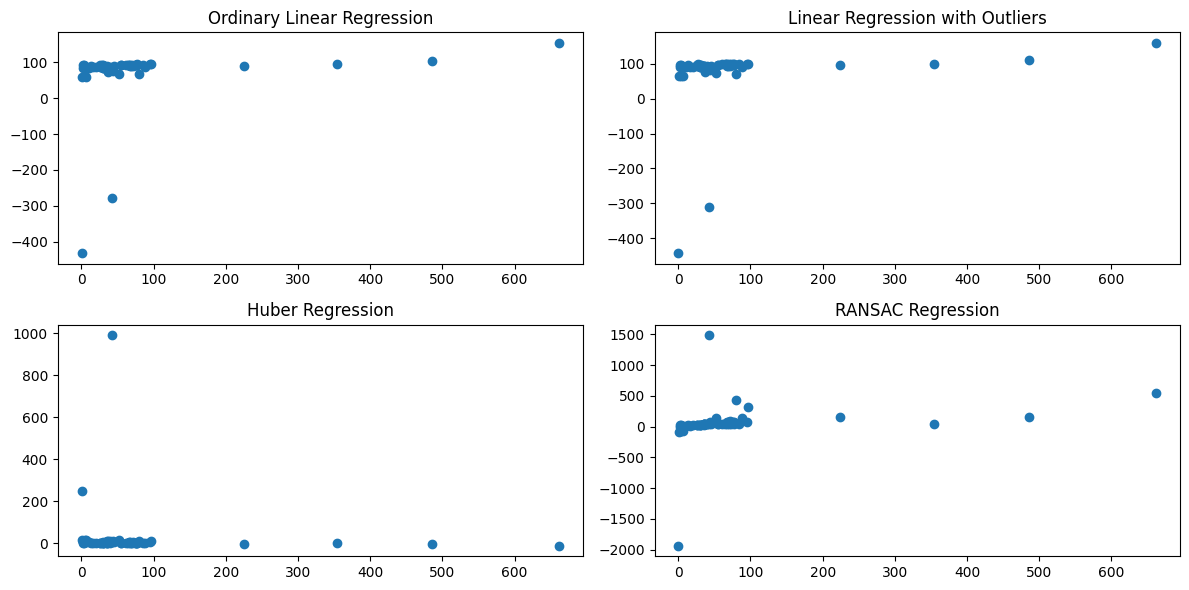

In [9]:
# Plot the predictions of each model
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(y_test, lr_predictions)
plt.title('Ordinary Linear Regression')

plt.subplot(2, 2, 2)
plt.scatter(y_test, lr_predictions_outliers)
plt.title('Linear Regression with Outliers')

plt.subplot(2, 2, 3)
plt.scatter(y_test, huber_predictions)
plt.title('Huber Regression')

plt.subplot(2, 2, 4)
plt.scatter(y_test, ransac_predictions)
plt.title('RANSAC Regression')

plt.tight_layout()
plt.show()

**How does each model handle modeling errors?**

In [10]:
# Introduce modeling errors in the features
X_train_errors = X_train.copy()
X_train_errors.iloc[0, 0] = 1000  # Introducing a modeling error in the first row

# Fit linear regression on data with modeling errors
lr_model_errors = LinearRegression()
lr_model_errors.fit(X_train_errors, y_train)

# Evaluate the performance with modeling errors
lr_predictions_errors = lr_model_errors.predict(X_test)
lr_rmse_errors = np.sqrt(mean_squared_error(y_test, lr_predictions_errors))
lr_r2_errors = r2_score(y_test, lr_predictions_errors)

print("Question 6: How does each model handle modeling errors?")
print(f"Linear Regression (with modeling errors) RMSE: {lr_rmse_errors}")
print(f"Linear Regression (with modeling errors) R^2 Score: {lr_r2_errors}\n")


Question 6: How does each model handle modeling errors?
Linear Regression (with modeling errors) RMSE: 126.17842644457741
Linear Regression (with modeling errors) R^2 Score: -0.26865417428256455



**How does Huber Regression handle modeling errors?**

In [11]:
# Fit a Huber Regression model with modeling errors
huber_model_errors = HuberRegressor()
huber_model_errors.fit(X_train_errors, y_train)

# Evaluate the performance of Huber Regression with modeling errors
huber_predictions_errors = huber_model_errors.predict(X_test)
huber_rmse_errors = np.sqrt(mean_squared_error(y_test, huber_predictions_errors))
huber_r2_errors = r2_score(y_test, huber_predictions_errors)

print("Question 7: How does Huber Regression handle modeling errors?")
print(f"Huber Regression (with modeling errors) RMSE: {huber_rmse_errors}")
print(f"Huber Regression (with modeling errors) R^2 Score: {huber_r2_errors}\n")


Question 7: How does Huber Regression handle modeling errors?
Huber Regression (with modeling errors) RMSE: 186.4102606715591
Huber Regression (with modeling errors) R^2 Score: -1.7689343957820665



**How does RANSAC Regression handle modeling errors?**

In [12]:
# Fit a RANSAC Regression model with modeling errors
ransac_model_errors = RANSACRegressor()
ransac_model_errors.fit(X_train_errors, y_train)

# Evaluate the performance of RANSAC Regression with modeling errors
ransac_predictions_errors = ransac_model_errors.predict(X_test)
ransac_rmse_errors = np.sqrt(mean_squared_error(y_test, ransac_predictions_errors))
ransac_r2_errors = r2_score(y_test, ransac_predictions_errors)

print("Question 8: How does RANSAC Regression handle modeling errors?")
print(f"RANSAC Regression (with modeling errors) RMSE: {ransac_rmse_errors}")
print(f"RANSAC Regression (with modeling errors) R^2 Score: {ransac_r2_errors}\n")


Question 8: How does RANSAC Regression handle modeling errors?
RANSAC Regression (with modeling errors) RMSE: 244.0743709831006
RANSAC Regression (with modeling errors) R^2 Score: -3.746979936192006



**How do residuals compare between ordinary linear regression and Huber Regression?**

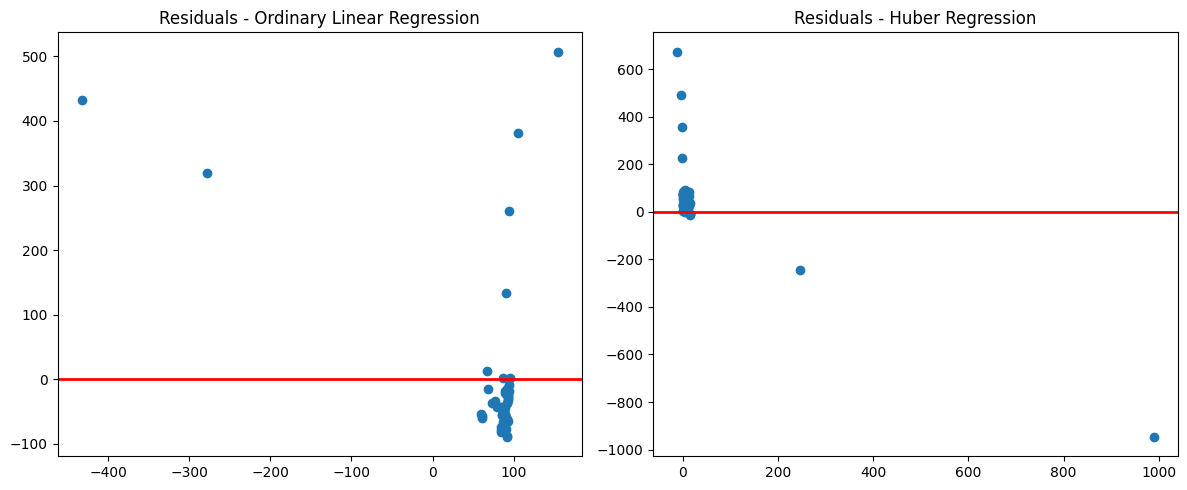

In [13]:
# Calculate residuals for both models
lr_residuals = y_test - lr_predictions
huber_residuals = y_test - huber_predictions

# Plot residuals for both models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(lr_predictions, lr_residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals - Ordinary Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(huber_predictions, huber_residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals - Huber Regression')

plt.tight_layout()
plt.show()


**How do residuals compare between ordinary linear regression and RANSAC Regression?**

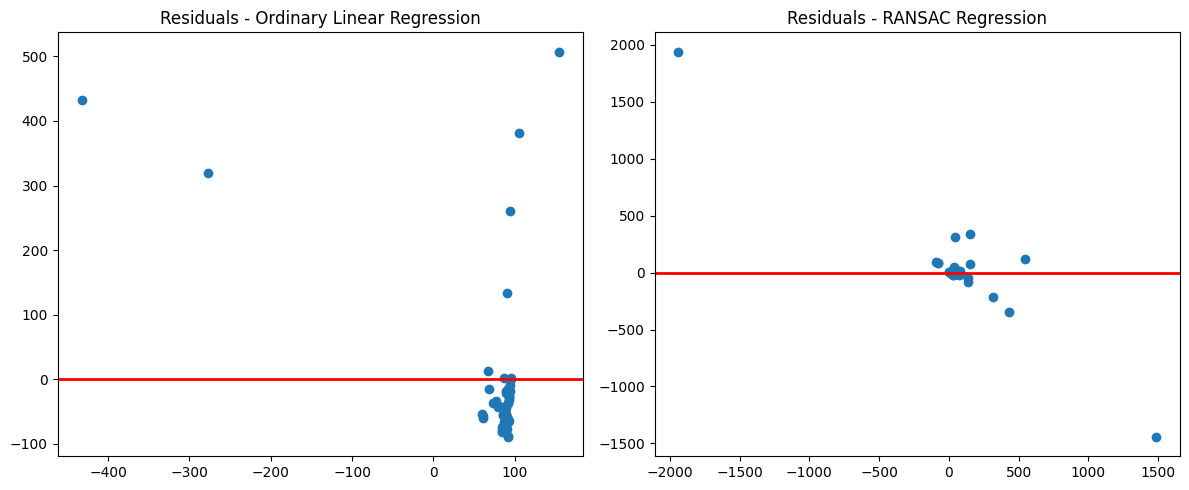

In [14]:
# Calculate residuals for both models
ransac_residuals = y_test - ransac_predictions

# Plot residuals for both models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(lr_predictions, lr_residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals - Ordinary Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(ransac_predictions, ransac_residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals - RANSAC Regression')

plt.tight_layout()
plt.show()


**How does the Huber Regression model handle a combination of outliers and modeling errors?**

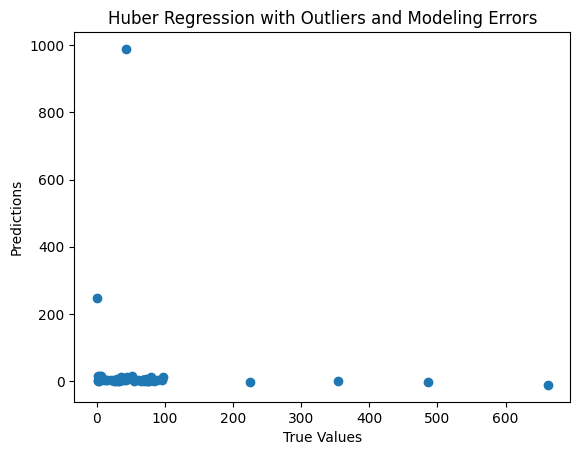

Question 11: How does the Huber Regression model handle a combination of outliers and modeling errors?
Huber Regression (combined) RMSE: 186.4050321274436
Huber Regression (combined) R^2 Score: -1.7687790685747298



In [15]:
# Fit a Huber Regression model with both outliers and modeling errors
huber_model_combined = HuberRegressor()
huber_model_combined.fit(X_train_errors, y_train_outliers)  # using data with both outliers and errors

# Evaluate the performance of Huber Regression with both outliers and modeling errors
huber_predictions_combined = huber_model_combined.predict(X_test)
huber_rmse_combined = np.sqrt(mean_squared_error(y_test, huber_predictions_combined))
huber_r2_combined = r2_score(y_test, huber_predictions_combined)

# Plot the predictions with both outliers and modeling errors
plt.scatter(y_test, huber_predictions_combined)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Huber Regression with Outliers and Modeling Errors')
plt.show()

print("Question 11: How does the Huber Regression model handle a combination of outliers and modeling errors?")
print(f"Huber Regression (combined) RMSE: {huber_rmse_combined}")
print(f"Huber Regression (combined) R^2 Score: {huber_r2_combined}\n")


**How does the energy use intensity vary across different building types?**

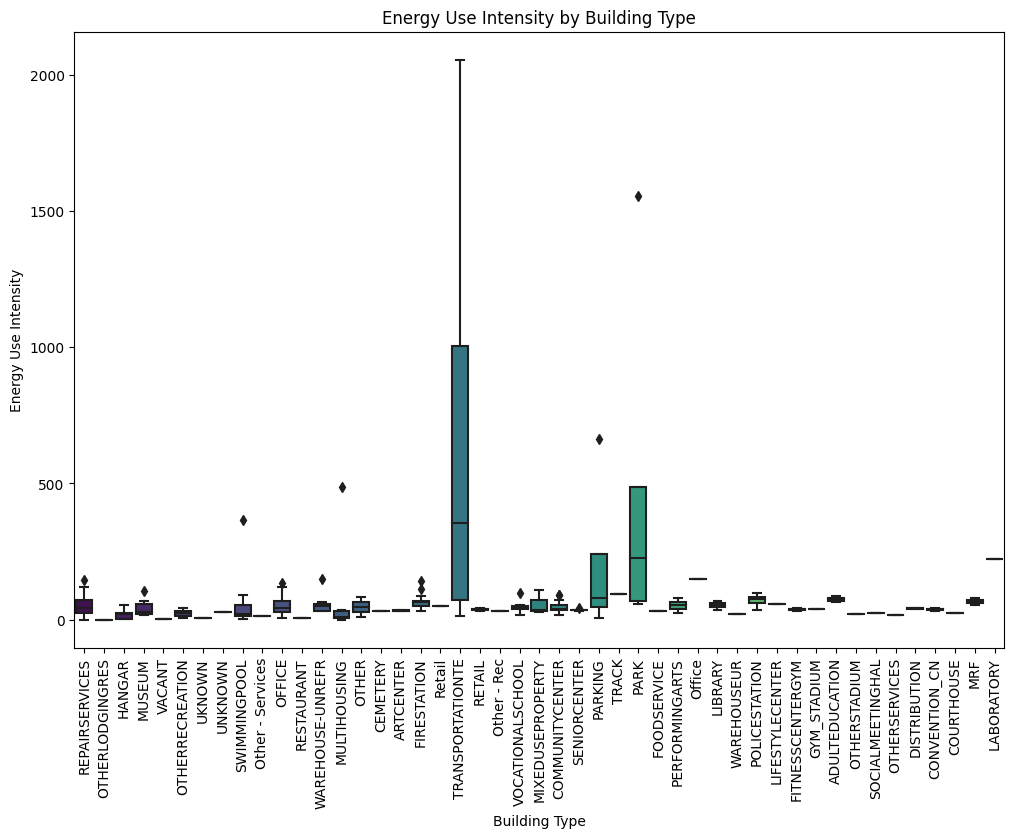

In [18]:
import seaborn as sns
# Boxplot of energy use intensity by building type
plt.figure(figsize=(12, 8))
sns.boxplot(x='building_type', y='energy_use_intensity', data=data, palette='viridis')
plt.title('Energy Use Intensity by Building Type')
plt.xlabel('Building Type')
plt.xticks(rotation=90)
plt.ylabel('Energy Use Intensity')
plt.show()


**Are there any spatial patterns in energy use intensity?**

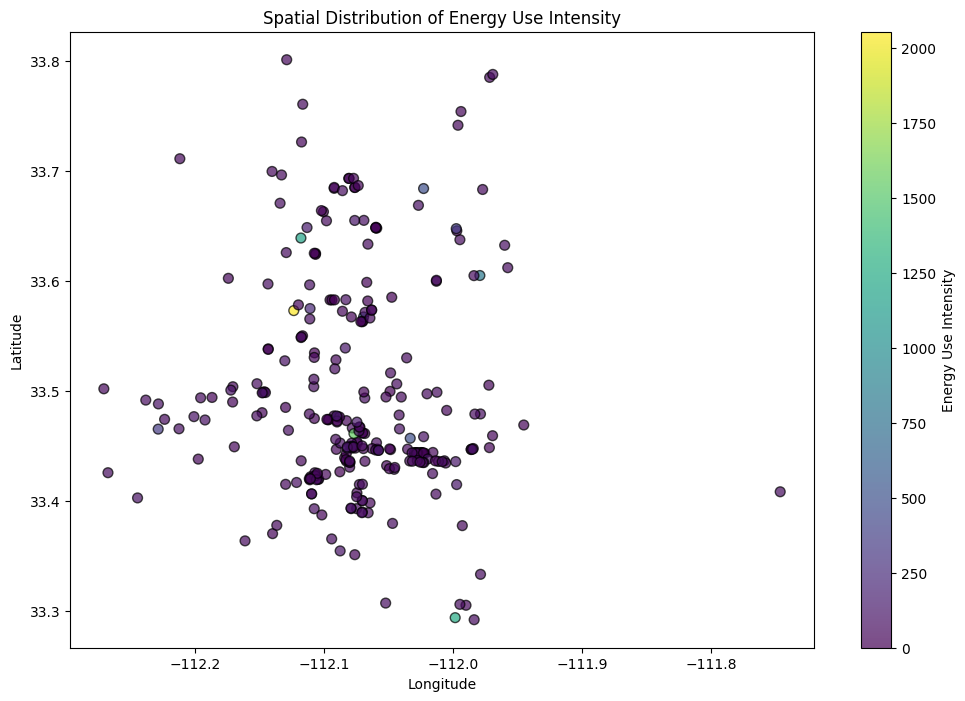

In [19]:
# Scatter plot of energy use intensity by longitude and latitude
plt.figure(figsize=(12, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['energy_use_intensity'], cmap='viridis', s=50, edgecolors='k', alpha=0.7)
plt.colorbar(label='Energy Use Intensity')
plt.title('Spatial Distribution of Energy Use Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**What is the distribution of building areas?**

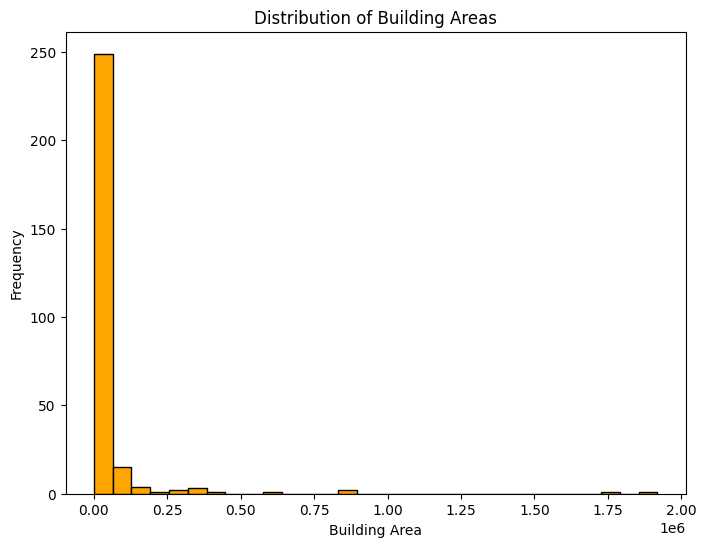

In [21]:
# Histogram of building areas
plt.figure(figsize=(8, 6))
plt.hist(data['building_area'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Building Areas')
plt.xlabel('Building Area')
plt.ylabel('Frequency')
plt.show()


**How are energy use intensity and natural gas usage related?**

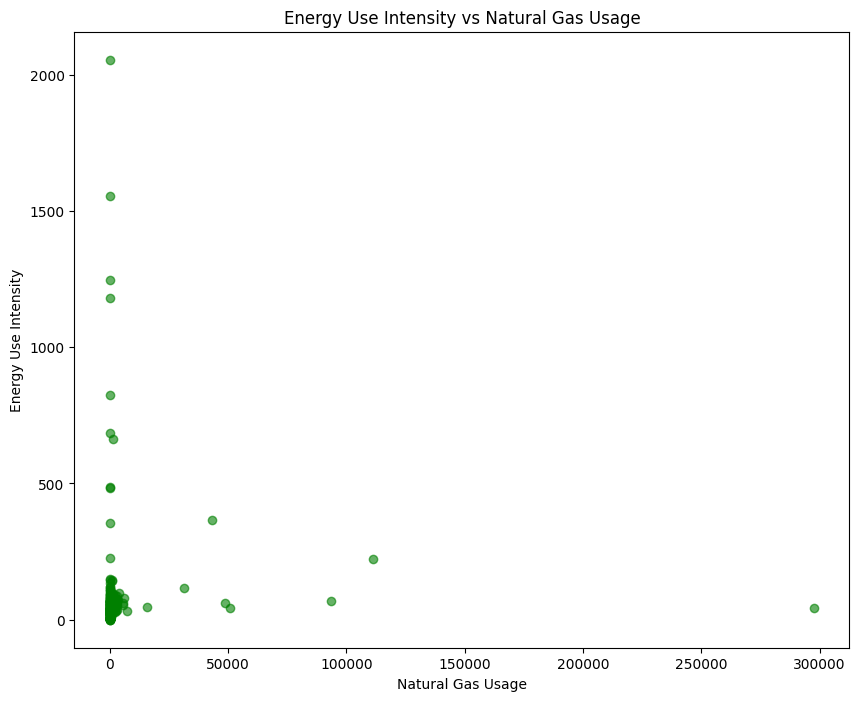

In [22]:
# Scatter plot of energy use intensity against natural gas usage
plt.figure(figsize=(10, 8))
plt.scatter(data['natural_gas_usage'], data['energy_use_intensity'], color='green', alpha=0.6)
plt.title('Energy Use Intensity vs Natural Gas Usage')
plt.xlabel('Natural Gas Usage')
plt.ylabel('Energy Use Intensity')
plt.show()


**What is the distribution of peak electric demand?**

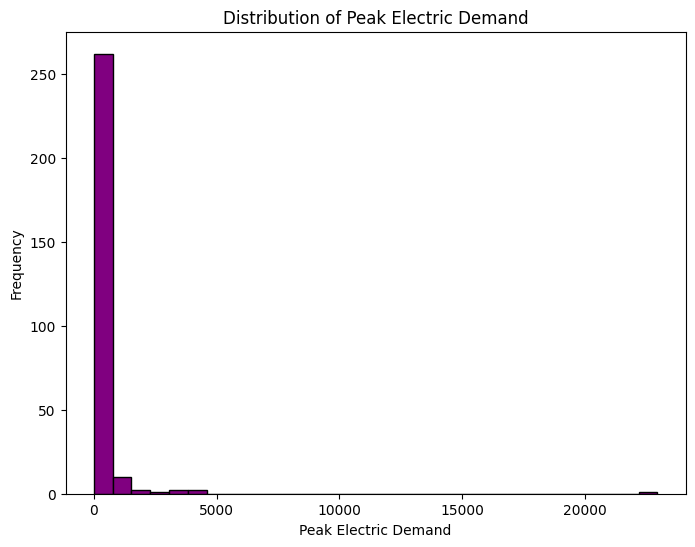

In [23]:
# Histogram of peak electric demand
plt.figure(figsize=(8, 6))
plt.hist(data['peak_electric_demand'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Peak Electric Demand')
plt.xlabel('Peak Electric Demand')
plt.ylabel('Frequency')
plt.show()


**How does energy use intensity vary across different electric utilities?**

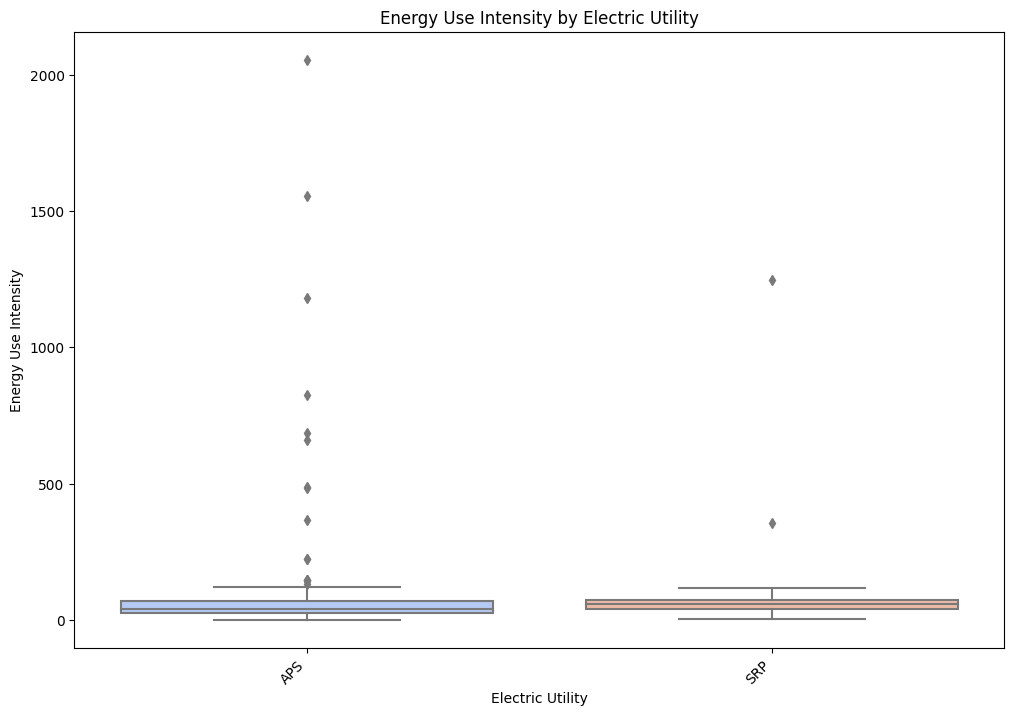

In [24]:
# Boxplot of energy use intensity by electric utility
plt.figure(figsize=(12, 8))
sns.boxplot(x='electric_utility', y='energy_use_intensity', data=data, palette='coolwarm')
plt.title('Energy Use Intensity by Electric Utility')
plt.xlabel('Electric Utility')
plt.ylabel('Energy Use Intensity')
plt.xticks(rotation=45, ha='right')
plt.show()


**How are numerical features correlated with each other using pair plots?**

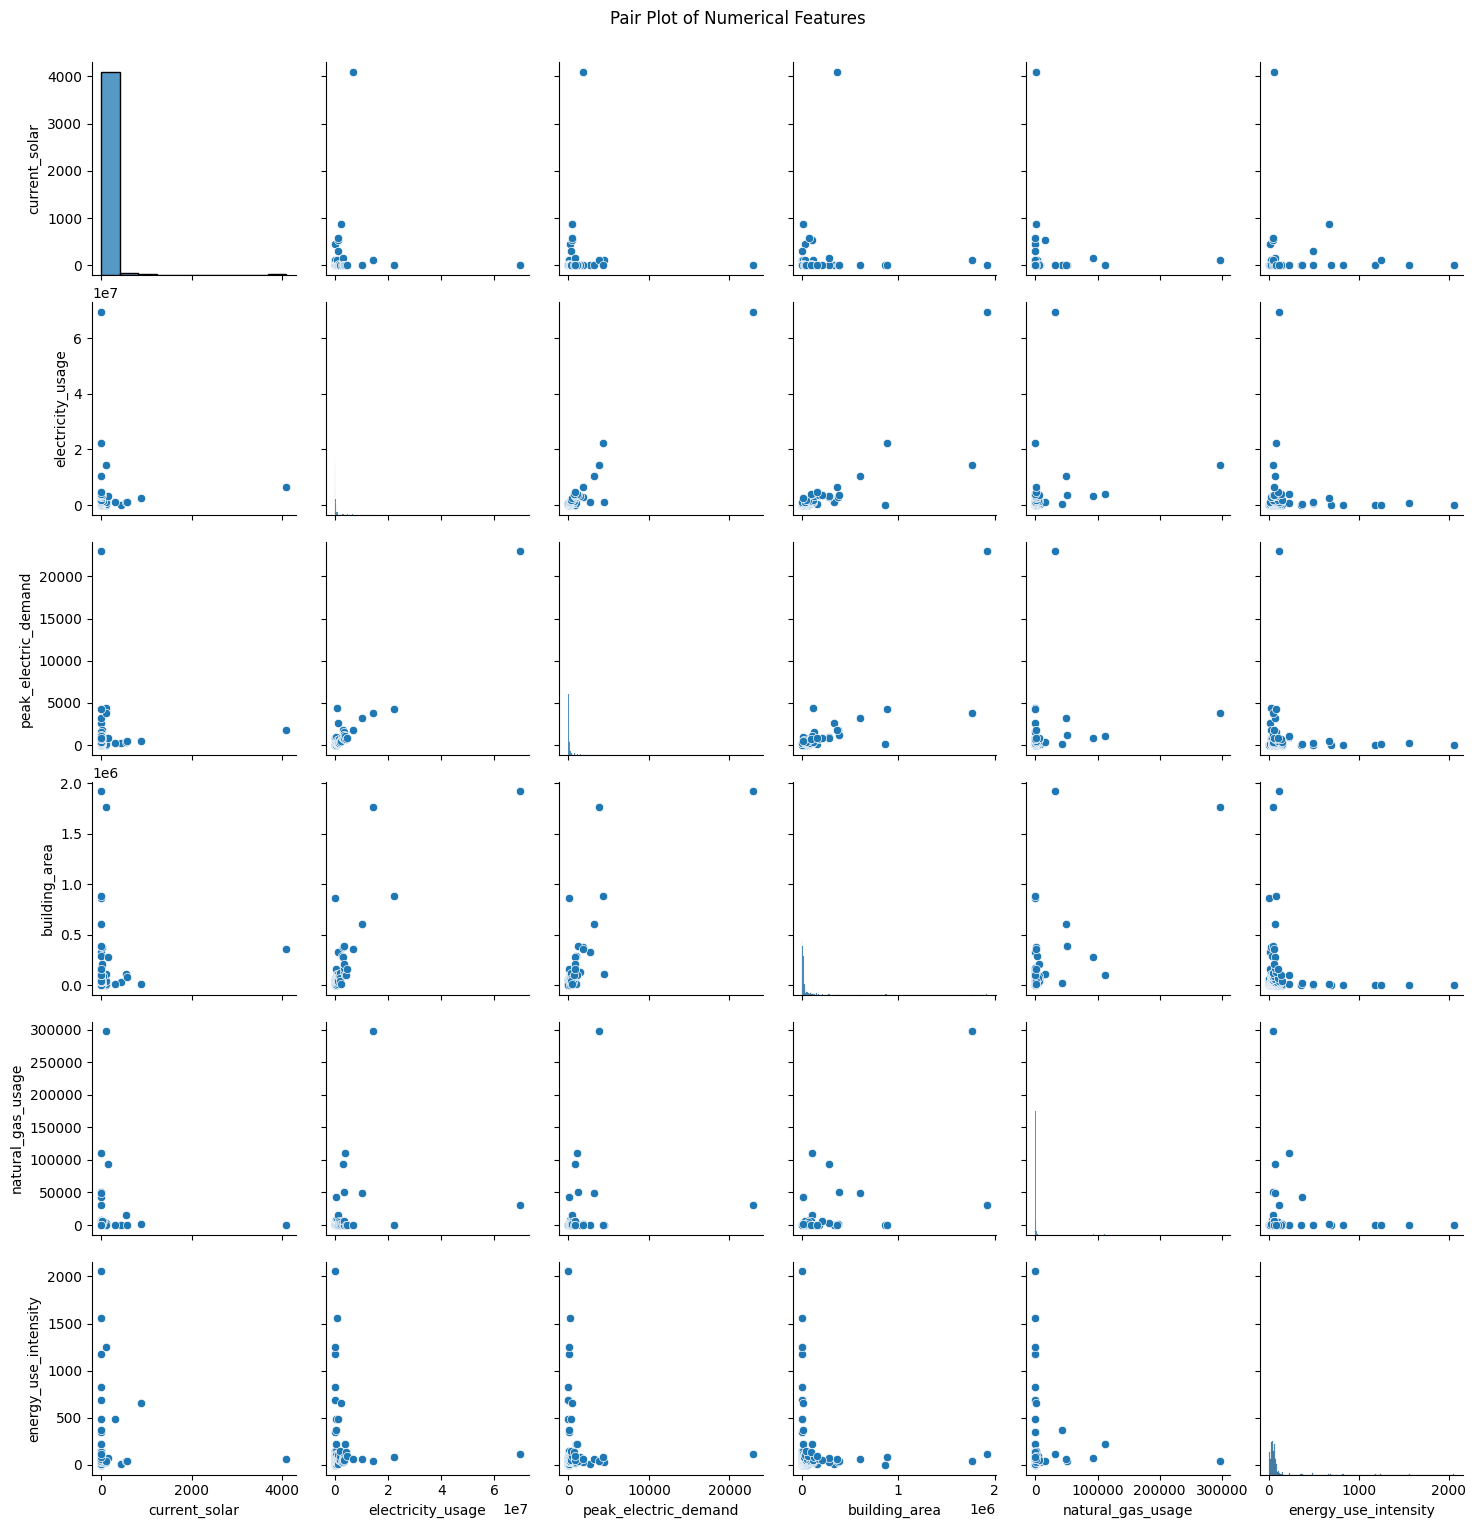

In [27]:
# Pair plot for numerical features
numerical_features = ['current_solar', 'electricity_usage', 'peak_electric_demand', 'building_area', 'natural_gas_usage', 'energy_use_intensity']
sns.pairplot(data[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


**What is the distribution of building types as a pie chart?**

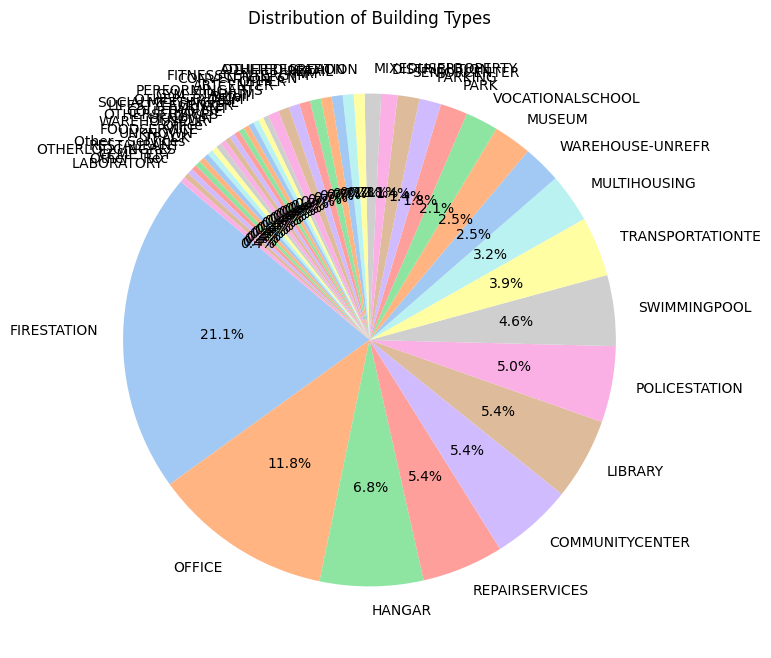

In [28]:
# Pie chart for distribution of building types
building_type_counts = data['building_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Building Types')
plt.show()
